In [42]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [43]:
train = np.loadtxt('digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('digit/test.csv', delimiter=',', skiprows=1)

In [44]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [45]:
train_img.shape

(42000, 28, 28)

In [46]:
test_img.shape

(28000, 28, 28)

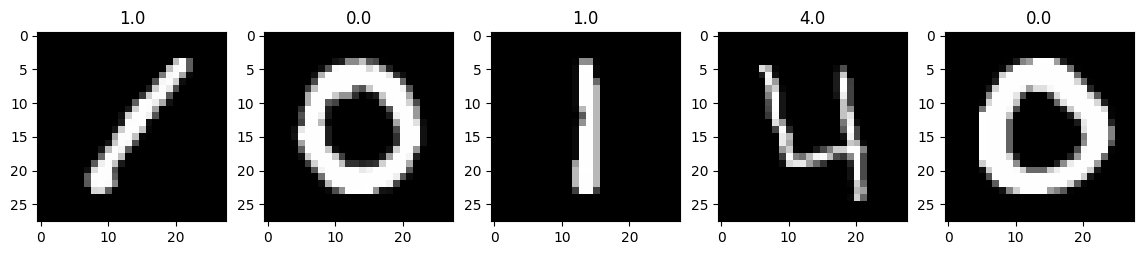

In [47]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [48]:
winSize = (28,28)
blockSize = (14,14)
blockStride = (14,14)
cellSize = (7,7)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,
                        blockSize,
                        blockStride,
                        cellSize,
                        nbins,
                        derivAperture,
                        winSigma,
                        histogramNormType,
                        L2HysThreshold,
                        gammaCorrection,
                        nlevels)

In [49]:
train_descriptors = []
test_descriptors = []

for i in range(len(train_img)):
  train_descriptors.append(hog.compute(np.uint8(train_img[i])))

for i in range(len(test_img)):
  test_descriptors.append(hog.compute(np.uint8(test_img[i])))

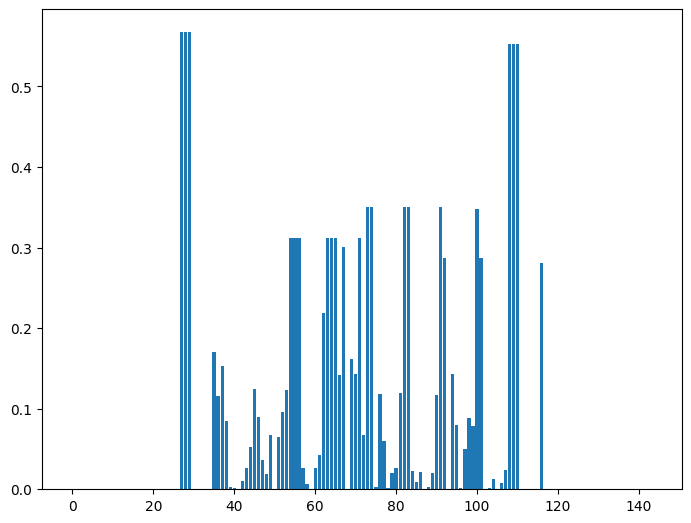

In [62]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(len(train_descriptors[0])), train_descriptors[0].reshape(-1))
plt.show()

In [50]:
from sklearn.preprocessing import normalize
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [51]:
model = Sequential([
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(64, activation='relu'),
  Dropout(0.1),
  Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [52]:
from keras.utils import to_categorical
cat_train_label = to_categorical(train_label)

X_train_normalized = normalize(train_descriptors)

In [53]:
history = model.fit(X_train_normalized, cat_train_label, epochs=10,
                    batch_size=5, verbose=1)

Epoch 1/10
8400/8400 [==============================] - 17s 2ms/step - loss: 0.2512 - accuracy: 0.9232
Epoch 2/10
8400/8400 [==============================] - 16s 2ms/step - loss: 0.1269 - accuracy: 0.9603
Epoch 3/10
8400/8400 [==============================] - 17s 2ms/step - loss: 0.1067 - accuracy: 0.9657
Epoch 4/10
8400/8400 [==============================] - 17s 2ms/step - loss: 0.0952 - accuracy: 0.9701
Epoch 5/10
8400/8400 [==============================] - 16s 2ms/step - loss: 0.0870 - accuracy: 0.9724
Epoch 6/10
8400/8400 [==============================] - 16s 2ms/step - loss: 0.0823 - accuracy: 0.9739
Epoch 7/10
8400/8400 [==============================] - 17s 2ms/step - loss: 0.0756 - accuracy: 0.9763
Epoch 8/10
8400/8400 [==============================] - 17s 2ms/step - loss: 0.0728 - accuracy: 0.9769
Epoch 9/10
8400/8400 [==============================] - 17s 2ms/step - loss: 0.0701 - accuracy: 0.9771
Epoch 10/10
8400/8400 [==============================] - 17s 2ms/step - l

In [54]:
X_test_normalized = normalize(test_descriptors)
y_pred = model.predict(X_test_normalized)

875/875 [==============================] - 2s 2ms/step


In [55]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [56]:
import pandas as pd

In [57]:
df_submission = pd.DataFrame(y_pred_classes, columns=['Label'])
df_submission.insert(0, 'ImageId', range(1, 1 + len(y_pred)))
df_submission.to_csv('submission.csv', index=False)
df_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [58]:
df_submission.shape

(28000, 2)